In [135]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [136]:
file_path = r'D:\Stations_data\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [137]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [138]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [139]:
df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [140]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-06-17') & (df1_1hr.index < '2020-06-24')
# date_mask2 = (df2_1hr.index >= '2020-06-17') & (df2_1hr.index < '2020-06-24')
# date_mask3 = (df3_1hr.index >= '2020-06-17') & (df3_1hr.index < '2020-06-24')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-01')
# date_mask2 = (df2_1hr.index >= '2020-09-25') & (df2_1hr.index < '2020-10-01')
# date_mask3 = (df3_1hr.index >= '2020-09-25') & (df3_1hr.index < '2020-10-01')

# # Winter
date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')

In [141]:
# date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
# date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
# date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

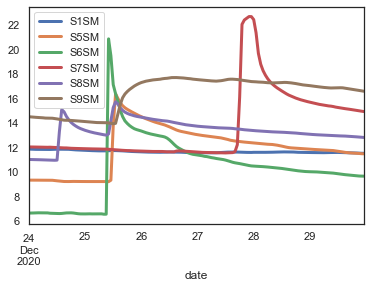

In [142]:
surface_SM = pd.concat([SM_sensor1, SM_sensor5, SM_sensor6, SM_sensor7, SM_sensor8, SM_sensor9], axis = 1).reset_index()
surface_SM.set_index('date', inplace = True)
surface_SM.to_csv("Bansathi_Surface_winter.csv", sep = ',')
surface_SM.plot();

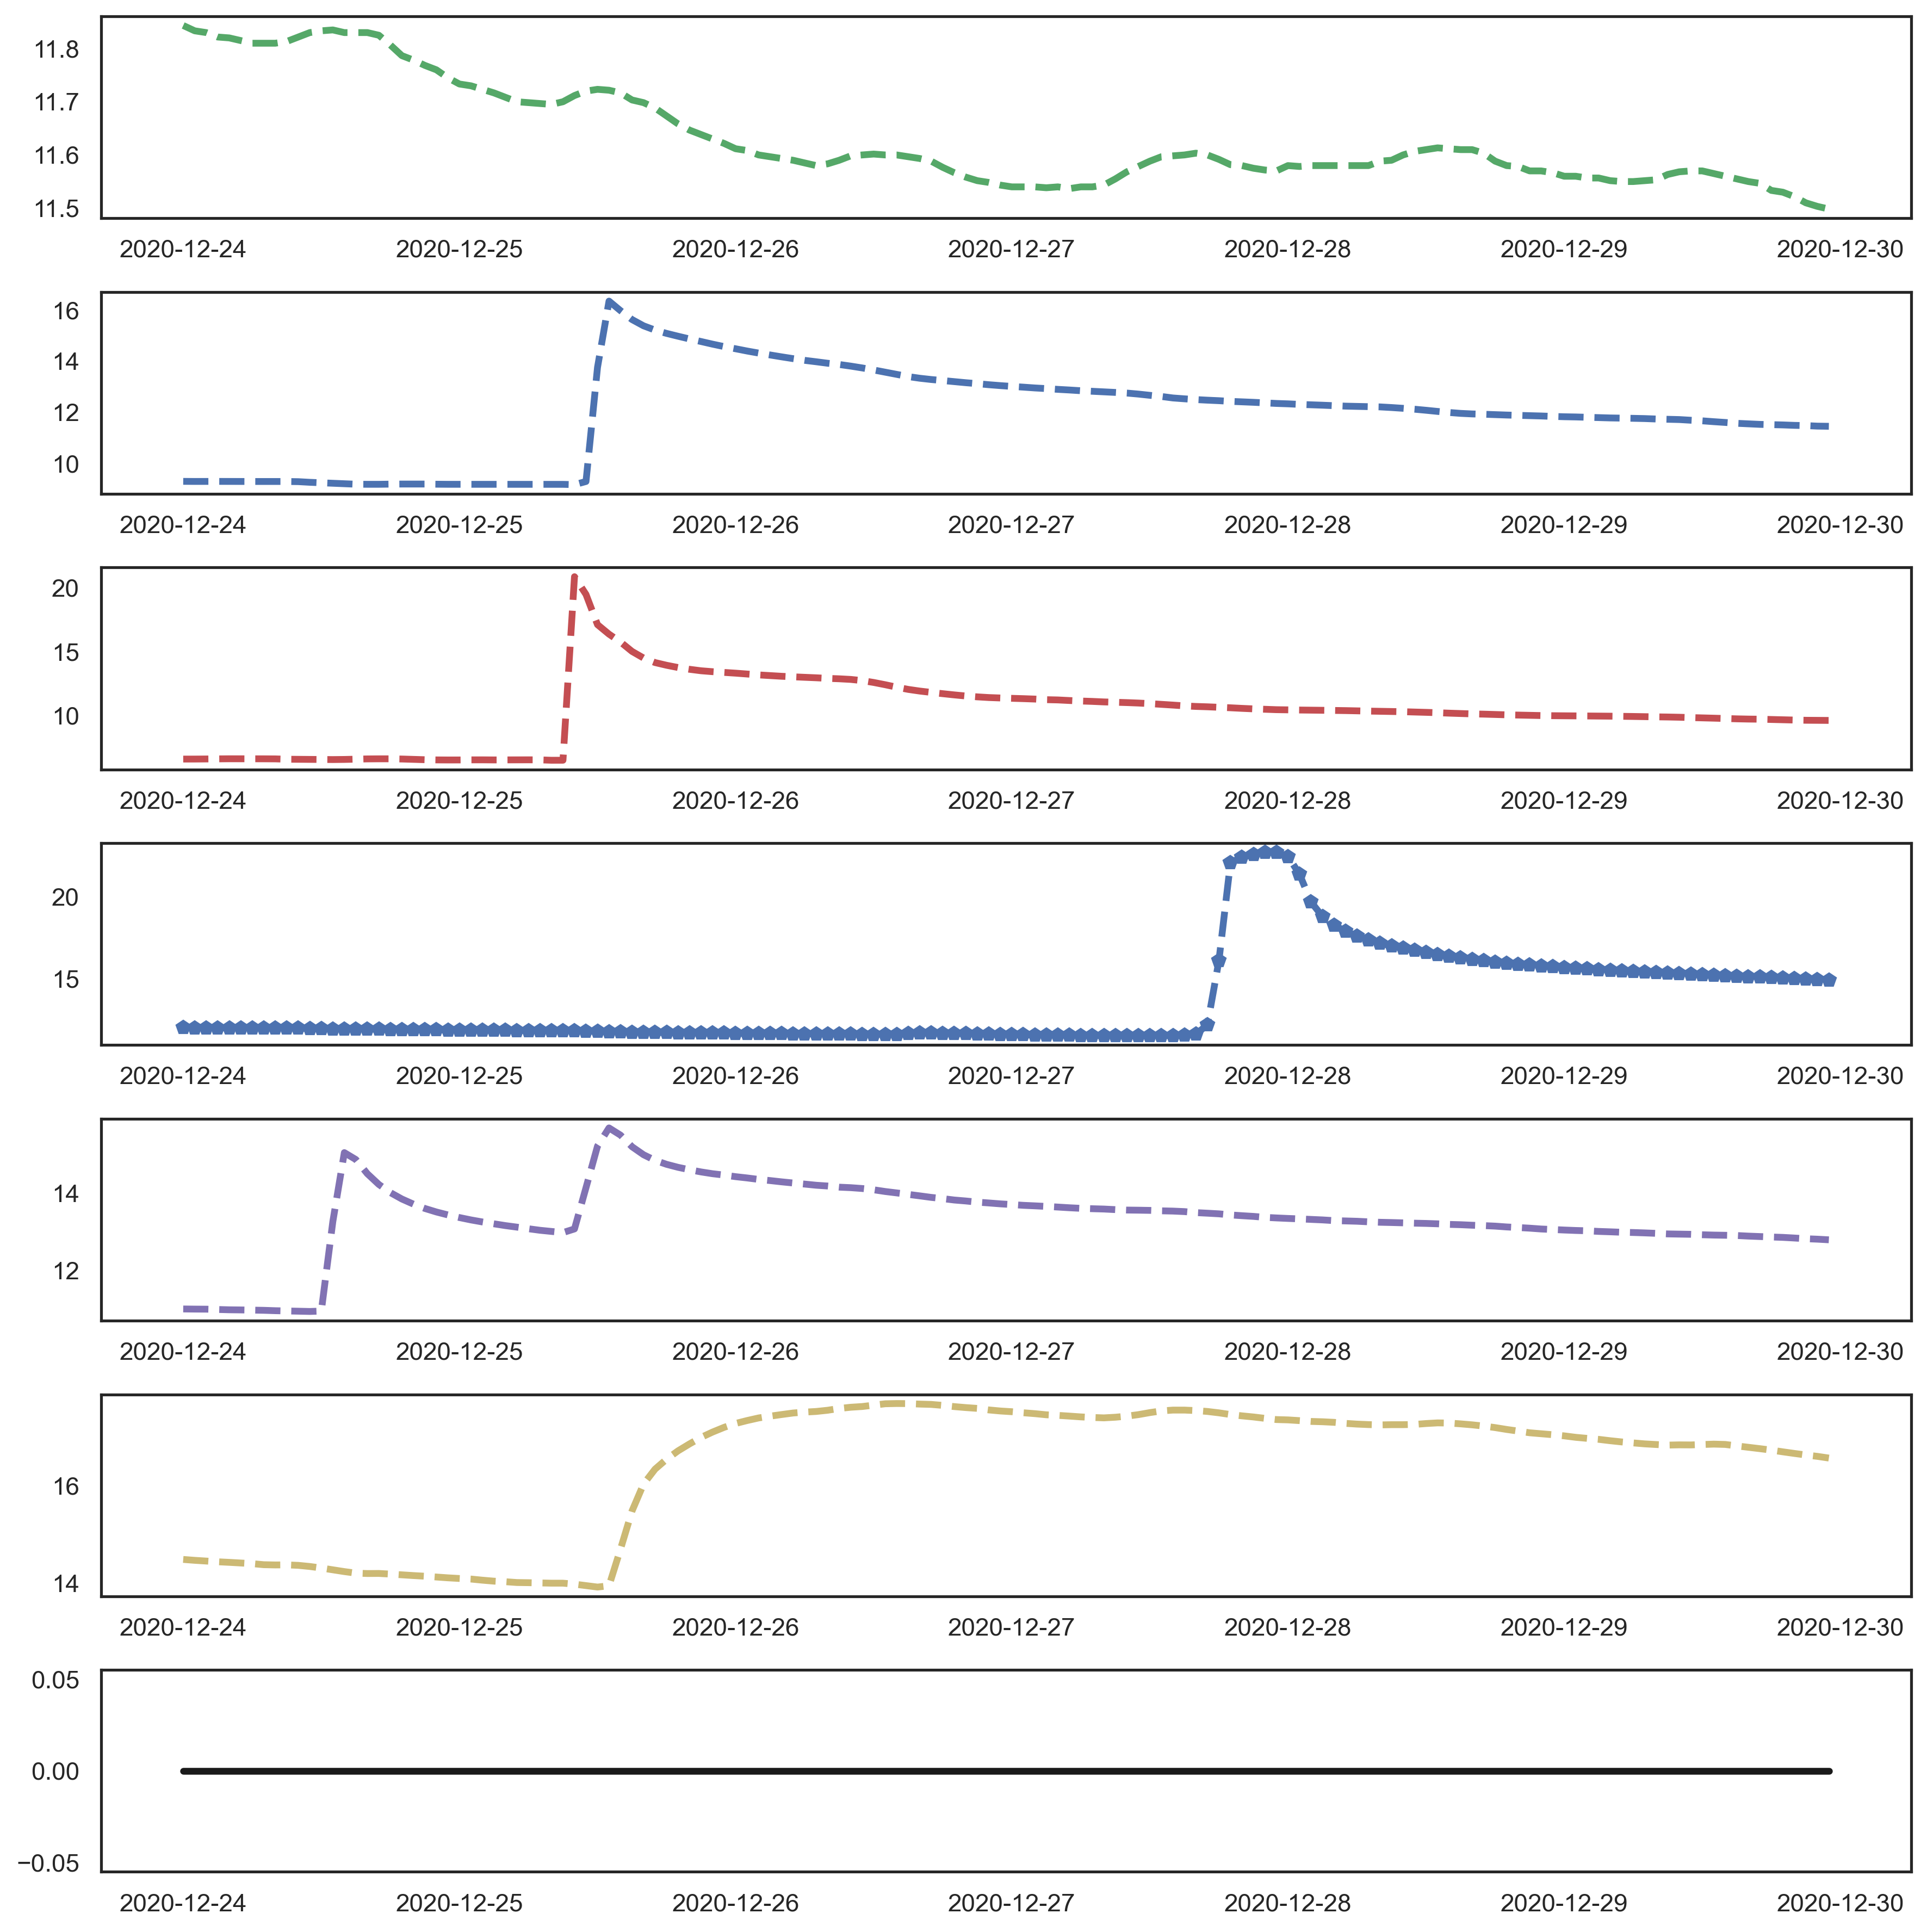

In [143]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax = plt.subplots(7, 1, figsize = (12, 12), dpi = 300)
ax[0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax[1].plot(SM_sensor5, 'b--', label = 'Sensor-5')
ax[2].plot(SM_sensor6, 'r--', label = 'Sensor-6')
ax[3].plot(SM_sensor7, 'p--', label = 'Sensor-7')
ax[4].plot(SM_sensor8, 'm--', label = 'Sensor-8')
ax[5].plot(SM_sensor9, 'y--', label = 'Sensor-9')
ax[6].plot(Rainfall, 'k', label = 'Rainfall');
plt.tight_layout()
# ax[0,1,2,3,4,5,6].legend();

In [144]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
# SM_sensor1

In [145]:
print('Sensor1_ST: \n', ST_sensor1.describe())
print('Sensor2_ST: \n', ST_sensor2.describe())
print('Sensor3_ST: \n', ST_sensor3.describe())
print('Sensor4_ST: \n', ST_sensor4.describe())
print('Sensor5_ST: \n', ST_sensor5.describe())
print('Sensor6_ST: \n', ST_sensor6.describe())
print('Sensor7_ST: \n', ST_sensor7.describe())
print('Sensor8_ST: \n', ST_sensor8.describe())
print('Sensor9_ST: \n', ST_sensor9.describe())
print('Sensor10_ST: \n', ST_sensor10.describe())
print('Air Temperature: \n', Air_Temp.describe())

Sensor1_ST: 
 count    144.000000
mean      14.523314
std        1.197425
min       12.488167
25%       13.519375
50%       14.477917
75%       15.467333
max       16.886667
Name: S1Temp, dtype: float64
Sensor2_ST: 
 count    144.000000
mean      15.916993
std        0.293527
min       15.310000
25%       15.689458
50%       15.955833
75%       16.118042
max       16.449333
Name: S2Temp, dtype: float64
Sensor3_ST: 
 count    144.000000
mean      17.338036
std        0.113559
min       17.134000
25%       17.251125
50%       17.324250
75%       17.428625
max       17.574333
Name: S3Temp, dtype: float64
Sensor4_ST: 
 count    144.000000
mean      18.494940
std        0.136315
min       18.306167
25%       18.353083
50%       18.472750
75%       18.634667
max       18.713667
Name: S4Temp, dtype: float64
Sensor5_ST: 
 count    144.000000
mean      14.436201
std        0.794171
min       12.910000
25%       13.807333
50%       14.461000
75%       15.021458
max       16.003667
Name: S5Temp, 

In [146]:
print('Sensor1_SM: \n', SM_sensor1.describe())
print('Sensor2_SM: \n', SM_sensor2.describe())
print('Sensor3_SM: \n', SM_sensor3.describe())
print('Sensor4_SM: \n', SM_sensor4.describe())
print('Sensor5_SM: \n', SM_sensor5.describe())
print('Sensor6_SM: \n', SM_sensor6.describe())
print('Sensor7_SM: \n', SM_sensor7.describe())
print('Sensor8_SM: \n', SM_sensor8.describe())
print('Sensor9_SM: \n', SM_sensor9.describe())
print('Sensor10_SM: \n', SM_sensor10.describe())

Sensor1_SM: 
 count    144.000000
mean      11.632558
std        0.095845
min       11.498333
25%       11.566667
50%       11.593333
75%       11.700000
max       11.843333
Name: S1SM, dtype: float64
Sensor2_SM: 
 count    144.000000
mean      17.175150
std        0.074242
min       17.068333
25%       17.129167
50%       17.150000
75%       17.200000
max       17.356667
Name: S2SM, dtype: float64
Sensor3_SM: 
 count    144.000000
mean      18.546157
std        0.054605
min       18.460000
25%       18.500000
50%       18.539167
75%       18.587917
max       18.656667
Name: S3SM, dtype: float64
Sensor4_SM: 
 count    144.000000
mean      18.352187
std        0.072938
min       18.223333
25%       18.293333
50%       18.350000
75%       18.401667
max       18.490000
Name: S4SM, dtype: float64
Sensor5_SM: 
 count    144.000000
mean      11.922269
std        1.844390
min        9.176667
25%       10.921250
50%       12.107500
75%       13.027917
max       16.358333
Name: S5SM, dtype: flo

### PLOTS 

In [147]:
S1_moisture = SM_sensor1.values
S2_moisture = SM_sensor2.values
S3_moisture = SM_sensor3.values
S4_moisture = SM_sensor4.values
S5_moisture = SM_sensor5.values
S6_moisture = SM_sensor6.values
S7_moisture = SM_sensor7.values
S8_moisture = SM_sensor8.values
S9_moisture = SM_sensor9.values
S10_moisture = SM_sensor10.values

In [148]:
S1_temp = ST_sensor1.values
S2_temp = ST_sensor2.values
S3_temp = ST_sensor3.values
S4_temp = ST_sensor4.values
S5_temp = ST_sensor5.values
S6_temp = ST_sensor6.values
S7_temp = ST_sensor7.values
S8_temp = ST_sensor8.values
S9_temp = ST_sensor9.values
S10_temp = ST_sensor10.values
Air_temp = Air_Temp.values

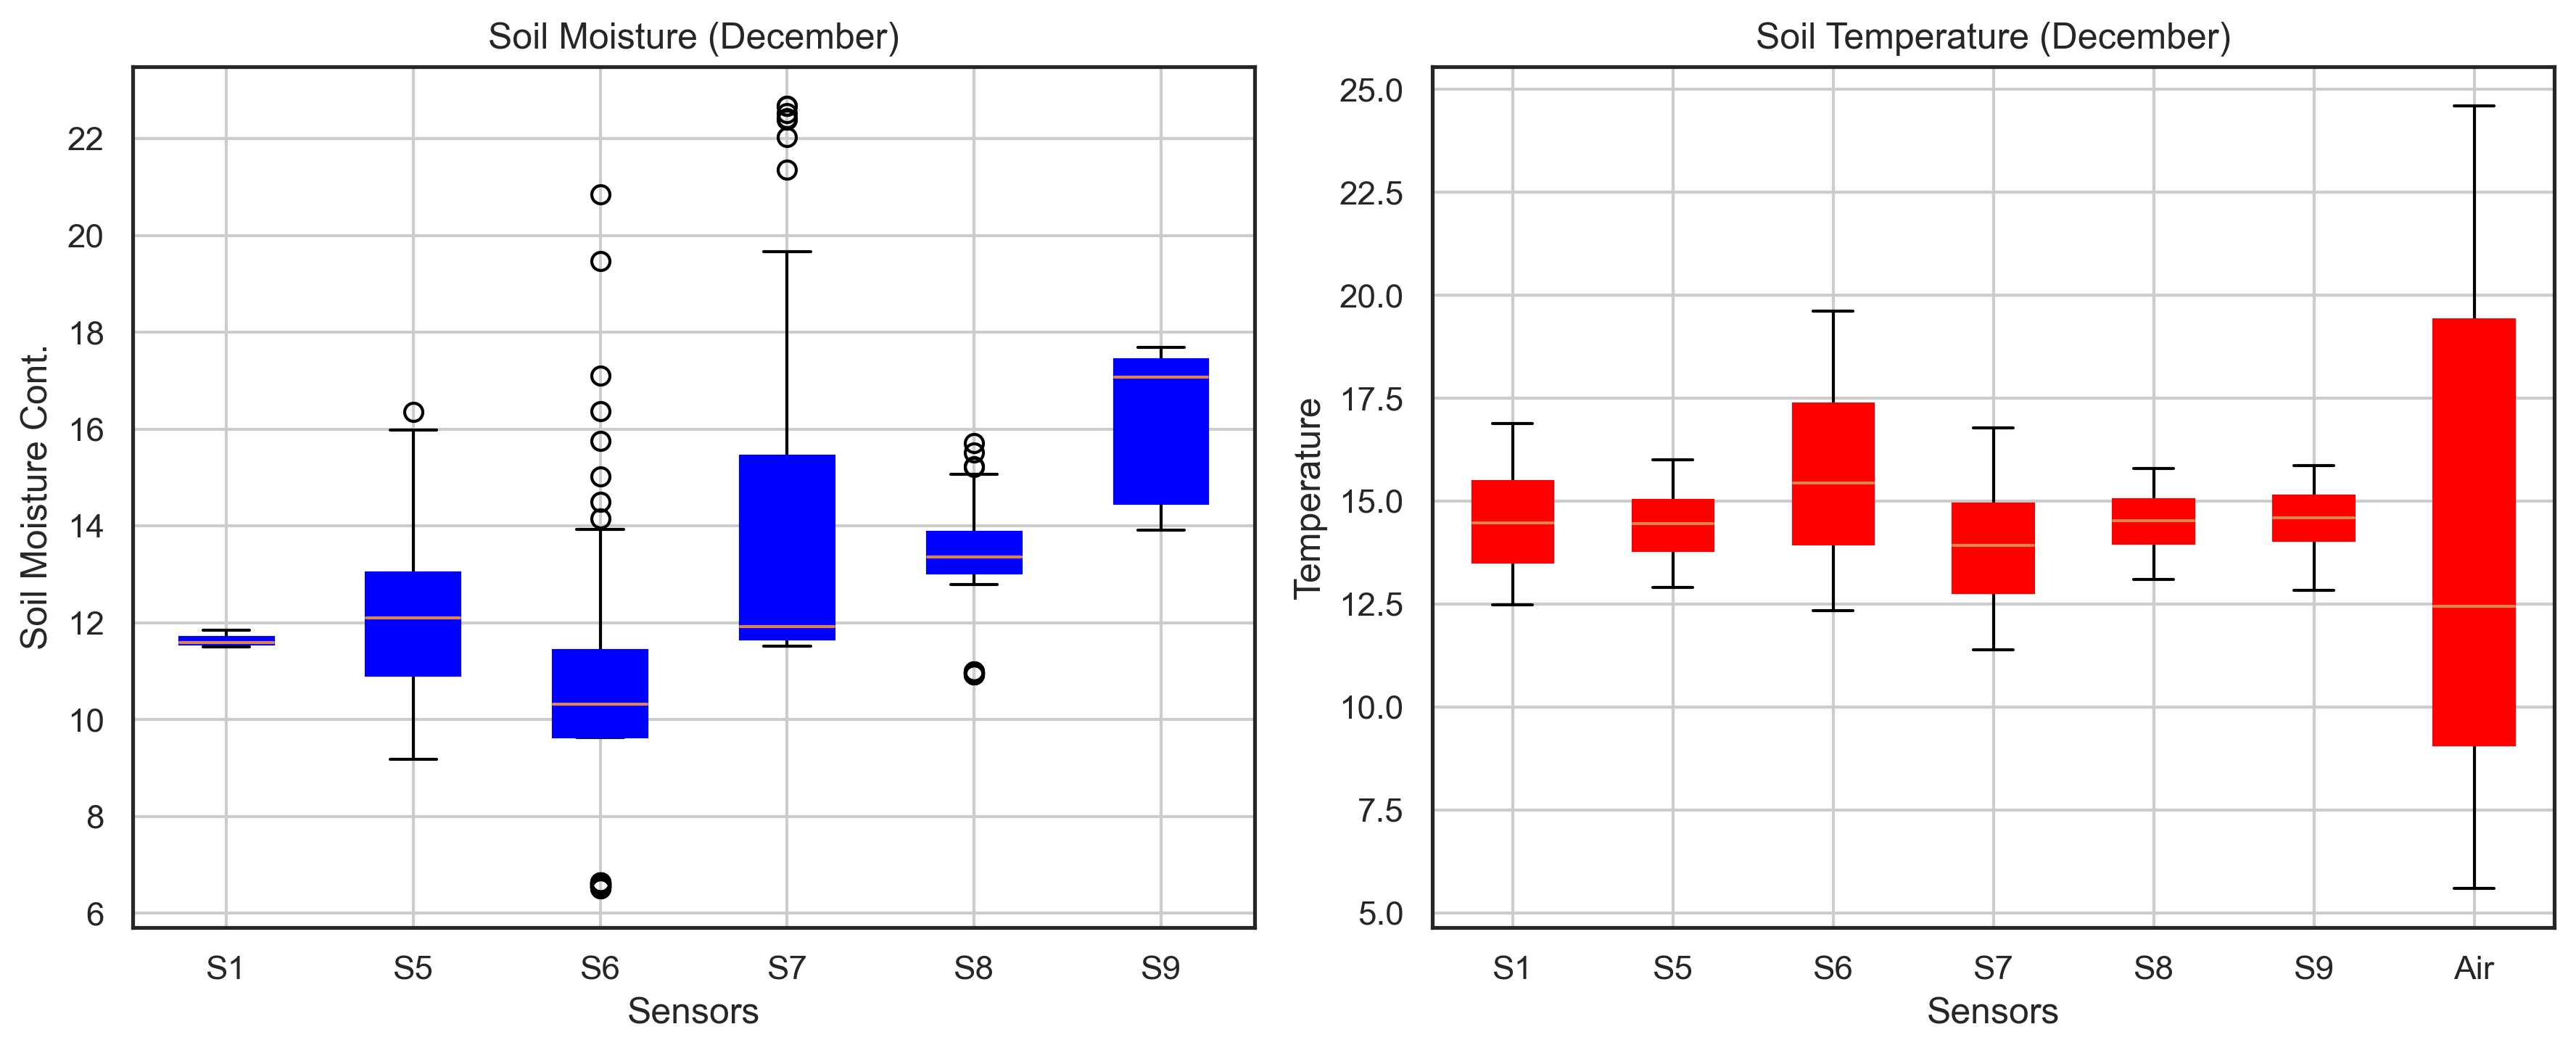

In [149]:
c1 = "blue"
c2 = "red"
c3 = "magenta"
labelsm = ["S1", "S5", "S6", "S7", "S8", "S9"]
labelst = ["S1", "S5", "S6", "S7", "S8", "S9", 'Air']

# label2 = "Air"

fig, axes = plt.subplots(1, 2, figsize = (12, 5), dpi = 300)
SM_data = [S1_moisture, S5_moisture, S6_moisture, S7_moisture, S8_moisture, S9_moisture]
ST_data = [S1_temp, S5_temp, S6_temp, S7_temp, S8_temp, S9_temp, Air_temp]
# bba = axes[1].twinx()
# fig.subtitle("Descriptive Statistical Analysis")
axes[0].set_title('Soil Moisture (December)')
axes[0].set_xlabel('Sensors')
axes[0].set_ylabel('Soil Moisture Cont.')
axes[1].set_ylabel('Temperature')
axes[1].set_xlabel('Sensors')
axes[1].set_title('Soil Temperature (December)')
ba = axes[0].boxplot(SM_data, patch_artist=True, labels = labelsm)
bb = axes[1].boxplot(ST_data, patch_artist=True, labels = labelst)
# bc = axes[1].boxplot(Air_temp, patch_artist = True)
# bb = axes[1].boxplot(Air_temp, patch_artist=True)

for box in ba['boxes']:
    box.set(color = c1)
    box.set(facecolor = c1)
for box in bb['boxes']:
    box.set(color = c2)
    box.set(facecolor = c2)
# for box in bc['boxes']:
#     box.set(color = c3)
#     box.set(facecolor = c3)

plt.tight_layout()
axes[0].grid()
axes[1].grid()
# bba.boxplot(Air_temp)
plt.show();

### Depth Profile 

In [150]:
# PRM = Pre-monsoon
# M = Monsoon
# PSM = Post-monsoon
# WTR = Winter
PRM_VC = [['0-5', 1.51, 7.89], ["5-25", 1.09, 13.77], ["25-50", 0.29, 13.85], ["50-80", 0.10, 10.03]]
M_VC = [['0-5', 4.61, 8.68], ["5-25", 0.78, 14.08], ["25-50", 0.63, 18.94], ["50-80", 2.6, 19.05]]
PSM_VC = [['0-5', 1.92, 7.78], ["5-25", 0.78, 17.88], ["25-50", 0.57, 21.18], ["50-80", 0.68, 21.94]]
WTR_VC = [['0-5', 0.77, 11.63], ["5-25", 0.47, 17.17], ["25-50", 0.27, 18.54], ["50-80", 0.38, 18.35]]

In [151]:
Bansathi_SM_profile_PRM_VC = pd.DataFrame(PRM_VC, columns = ["Depth", "VC", "Mean"])
Bansathi_SM_profile_M_VC = pd.DataFrame(M_VC, columns = ["Depth", "VC", "Mean"])
Bansathi_SM_profile_PSM_VC = pd.DataFrame(PSM_VC, columns = ["Depth", "VC", "Mean"])
Bansathi_SM_profile_WTR_VC = pd.DataFrame(WTR_VC, columns = ["Depth", "VC", "Mean"])

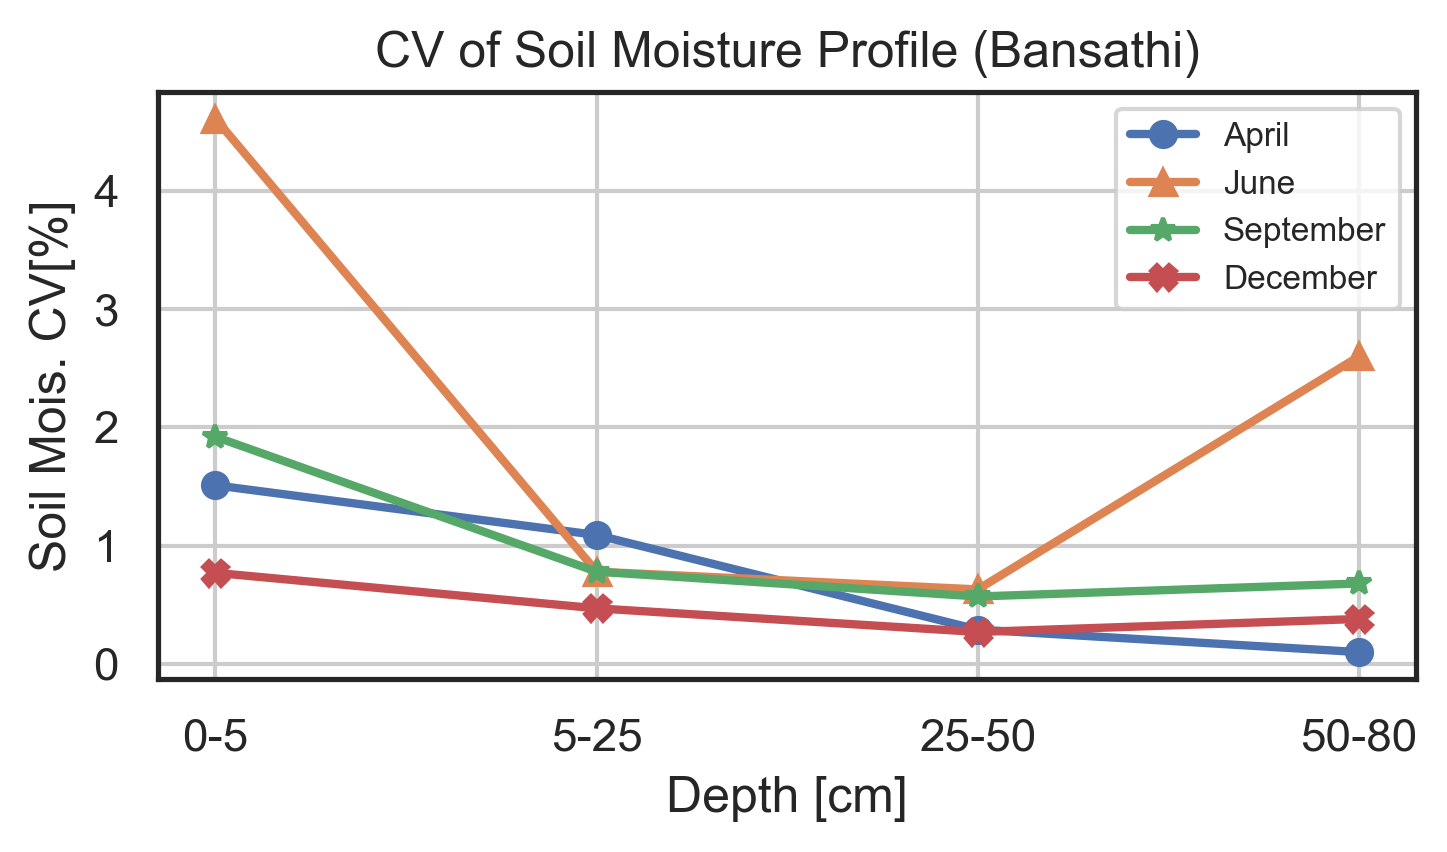

In [152]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bansathi_SM_profile_PRM_VC.Depth, Bansathi_SM_profile_PRM_VC.VC,'-o', lw = 2,
         label = 'April')
plt.plot(Bansathi_SM_profile_M_VC.Depth, Bansathi_SM_profile_M_VC.VC,'-^', lw = 2,
         label = 'June')
plt.plot(Bansathi_SM_profile_PSM_VC.Depth, Bansathi_SM_profile_PSM_VC.VC, '-*', lw = 2, 
        label = 'September')
plt.plot(Bansathi_SM_profile_WTR_VC.Depth, Bansathi_SM_profile_WTR_VC.VC, '-X', lw = 2,
         label = 'December')
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Mois. CV[%]')
plt.title('CV of Soil Moisture Profile (Bansathi)')
plt.tight_layout()
plt.grid()
plt.legend(prop={'size': 8});

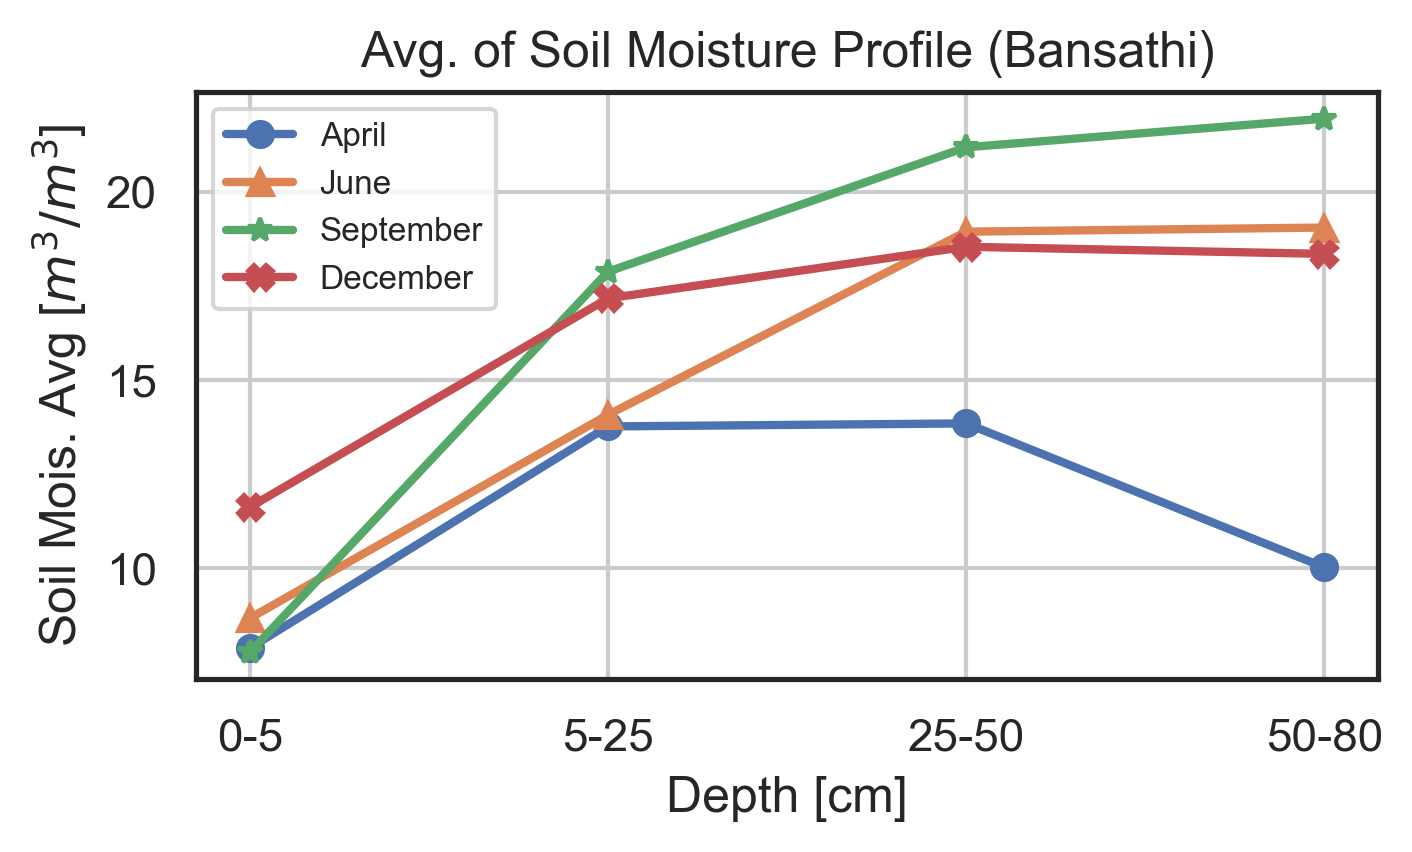

In [153]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bansathi_SM_profile_PRM_VC.Depth, Bansathi_SM_profile_PRM_VC.Mean, '-o', lw = 2,
         label = "April")
plt.plot(Bansathi_SM_profile_M_VC.Depth, Bansathi_SM_profile_M_VC.Mean, '-^', lw = 2,
         label = "June")
plt.plot(Bansathi_SM_profile_PSM_VC.Depth, Bansathi_SM_profile_PSM_VC.Mean, '-*', lw = 2, 
         label = "September")
plt.plot(Bansathi_SM_profile_WTR_VC.Depth, Bansathi_SM_profile_WTR_VC.Mean, '-X', lw = 2, 
         label = "December")
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Mois. Avg [$m^3/m^3$]')
plt.title('Avg. of Soil Moisture Profile (Bansathi)')
plt.grid()
plt.tight_layout()
plt.legend(prop={'size': 8});

In [154]:
ST_PRM = [['0-5', 6.26, 28.59], ["5-25", 2.09, 27.21], ["25-50", 1.47, 25.76], ["50-80", 1.33, 24.72]]
ST_M = [['0-5', 3.55, 31.52], ["5-25", 0.90, 31.00], ["25-50", 0.26, 30.26], ["50-80", 0.17, 29.64]]
ST_PSM = [['0-5', 6.51, 29.79], ["5-25", 1.60, 29.91], ["25-50", 0.33, 30.01], ["50-80", 0.50, 29.97]]
ST_WTR = [['0-5', 8.26, 14.52], ["5-25", 1.88, 15.92], ["25-50", 0.63, 17.34], ["50-80", 0.70, 18.50]]

In [155]:
Bansathi_ST_profile_PRM = pd.DataFrame(ST_PRM, columns = ["Depth", "VC", "Mean"])
Bansathi_ST_profile_M = pd.DataFrame(ST_M, columns = ["Depth", "VC", "Mean"])
Bansathi_ST_profile_PSM = pd.DataFrame(ST_PSM, columns = ["Depth", "VC", "Mean"])
Bansathi_ST_profile_WTR = pd.DataFrame(ST_WTR, columns = ["Depth", "VC", "Mean"])

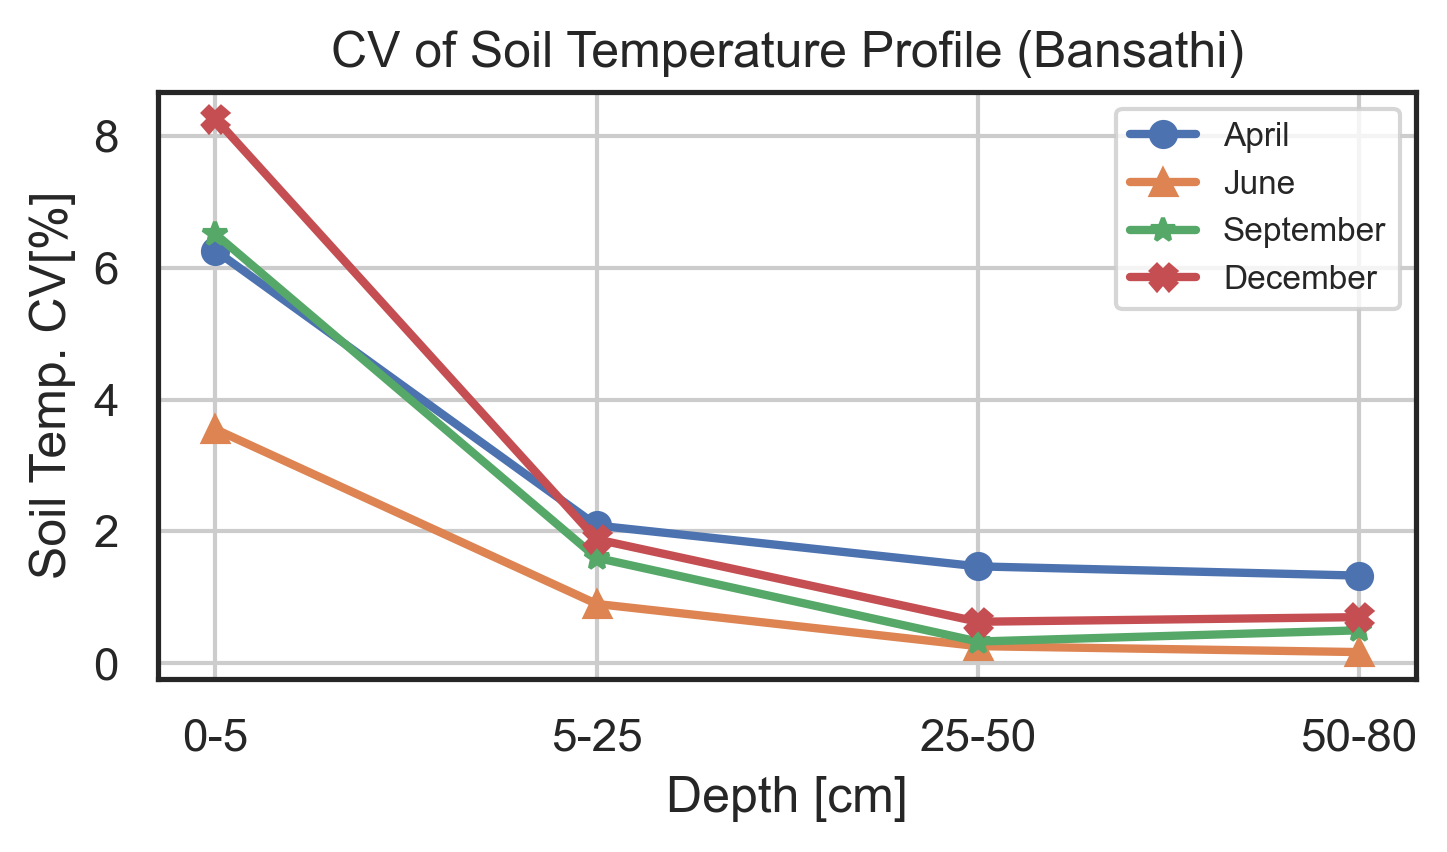

In [156]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bansathi_ST_profile_PRM.Depth, Bansathi_ST_profile_PRM.VC,'-o', lw = 2,
         label = 'April')
plt.plot(Bansathi_ST_profile_M.Depth, Bansathi_ST_profile_M.VC,'-^', lw = 2,
         label = 'June')
plt.plot(Bansathi_ST_profile_PSM.Depth, Bansathi_ST_profile_PSM.VC, '-*', lw = 2, 
        label = 'September')
plt.plot(Bansathi_ST_profile_WTR.Depth, Bansathi_ST_profile_WTR.VC, '-X', lw = 2,
         label = 'December')
plt.xlabel('Depth [cm]')
plt.ylabel('Soil Temp. CV[%]')
plt.title('CV of Soil Temperature Profile (Bansathi)')
plt.tight_layout()
plt.grid()
plt.legend(prop={'size': 8});

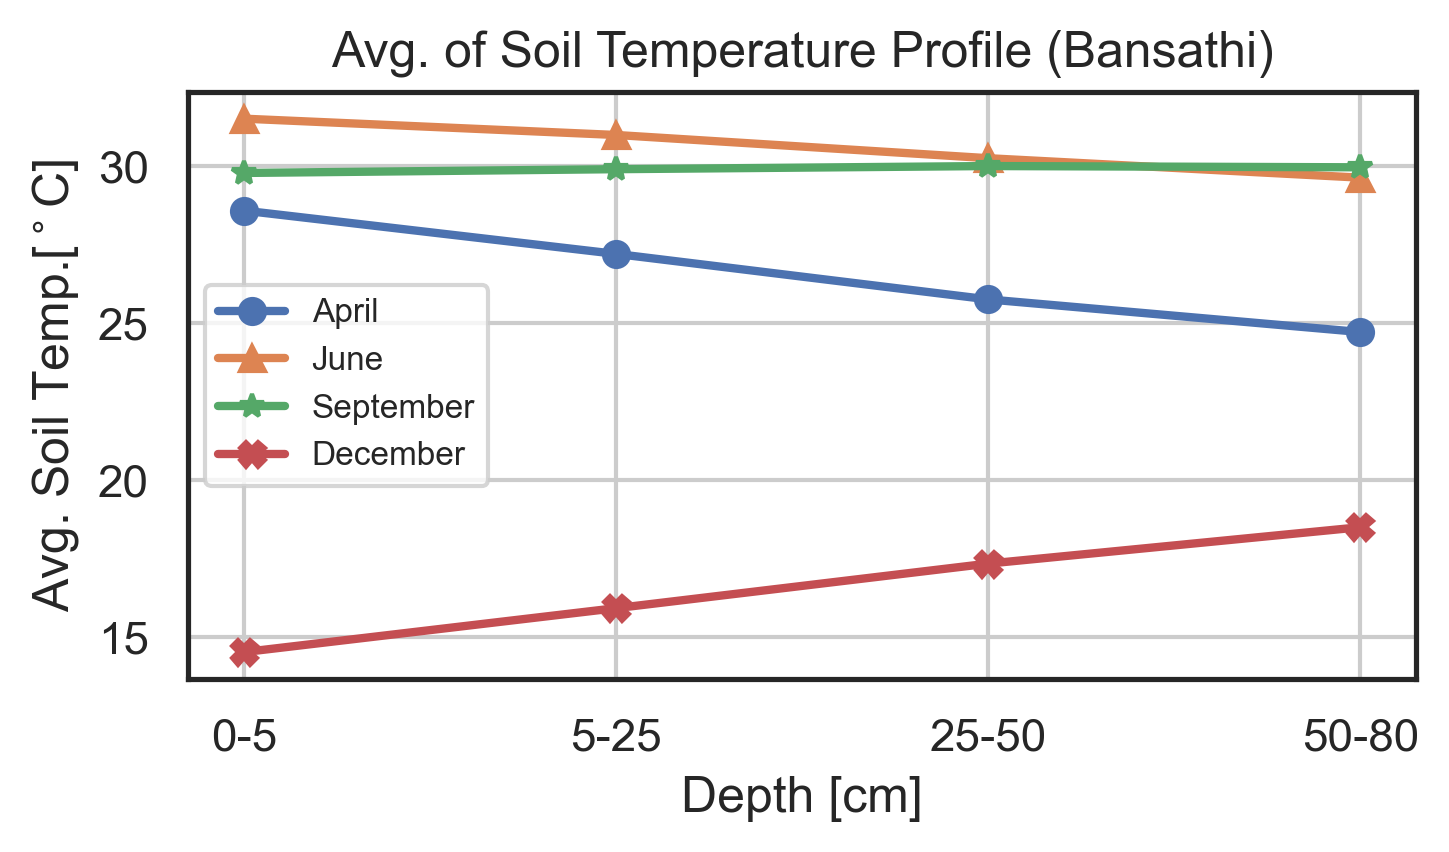

In [157]:
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(Bansathi_ST_profile_PRM.Depth, Bansathi_ST_profile_PRM.Mean,'-o', lw = 2,
         label = 'April')
plt.plot(Bansathi_ST_profile_M.Depth, Bansathi_ST_profile_M.Mean,'-^', lw = 2,
         label = 'June')
plt.plot(Bansathi_ST_profile_PSM.Depth, Bansathi_ST_profile_PSM.Mean, '-*', lw = 2, 
        label = 'September')
plt.plot(Bansathi_ST_profile_WTR.Depth, Bansathi_ST_profile_WTR.Mean, '-X', lw = 2,
         label = 'December')
plt.xlabel('Depth [cm]')
plt.ylabel('Avg. Soil Temp.[$^\circ$C]')
plt.title('Avg. of Soil Temperature Profile (Bansathi)')
plt.tight_layout()
plt.grid()
plt.legend(prop={'size': 8});